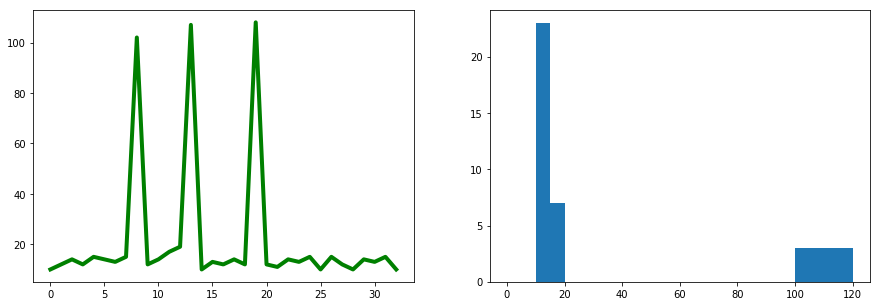

In [84]:
# There are number of ways to find the outliers
# Using scatter plot
# Using Box plot
dataset= [10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

# Using scatter plot
import matplotlib as mpl
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(dataset,'g', label='Predict', linewidth=4)
axes[1].hist(dataset,bins=[0,5,10,15,20,25,30,40,100,120])

plt.show()

# Using Z score
import numpy as np

mean=np.mean(dataset)
std=np.std(dataset)

outliers = []
for i in dataset : 
    
    n_dataset=(i-mean)/std
    
    if np.abs(n_dataset) > 2 :
        outliers.append(i)

outliers

# Using IQR interquantial range

dataset=np.sort(dataset)
quantile1, quantile3= np.percentile(dataset,[25,75])
IQR = quantile3 - quantile1

lower_bound_val = quantile1 -(1.5 * IQR) 
upper_bound_val = quantile3 +(1.5 * IQR)


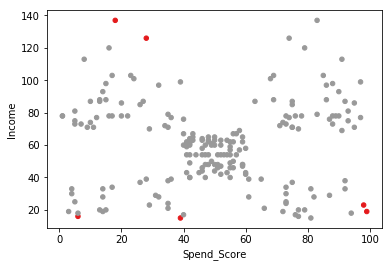

In [4]:
## Anomaly detection 
## Source: https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf

## Read the data. 
import numpy as np
import pandas as pd
from pandas import DataFrame

# index_col=0 considers ID as index for detecting. 
data = pd.read_excel('/Users/Behnoush/Documents/GitHub/Anomaly detection/Mall_Customers.xlsx') #, index_col=0)

data = pd.DataFrame(data,columns=['Genre','Age','Annual Income (k$)','Spending Score (1-100)'])
            
data = data.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)':'Spend_Score'})

# It heps to only with one line turn a string to a dummy variable! 
# df = pd.get_dummies(data)
# Be mindful of data type and the distance measure. 
# I’ve read that the gower distance metric can be used for mixed data types. 
# I’ve implemented Euclidean, here, which needs continuous variables, so I removed gender.
data = data.drop('Genre', axis=1) 

## Preprocessin data 
# In this approach, the data is scaled to a fixed range - usually 0 to 1. 
# The cost of having this bounded range - in contrast to standardization - is that 
# we will end up with smaller standard deviations, which can suppress the effect of outliers.
# A Min-Max scaling is typically done via the following equation:
# Xsc = X−Xmin / Xmax−Xmin.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
num2 = scaler.fit_transform(data)
num2 = pd.DataFrame(num2, columns = data.columns)

## 1st approach: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 5, 
 n_jobs = -1)
clusters = outlier_detection.fit_predict(num2)


from matplotlib import cm
cmap = cm.get_cmap('Set1')
data.plot.scatter(x='Spend_Score',y='Income', c=clusters, cmap=cmap, colorbar = False)
